In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **1-imporing and cleaning the data**

In [2]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
len(df['product_id'].unique())

1351

Text(0.5, 0.98, ' Data Quality')

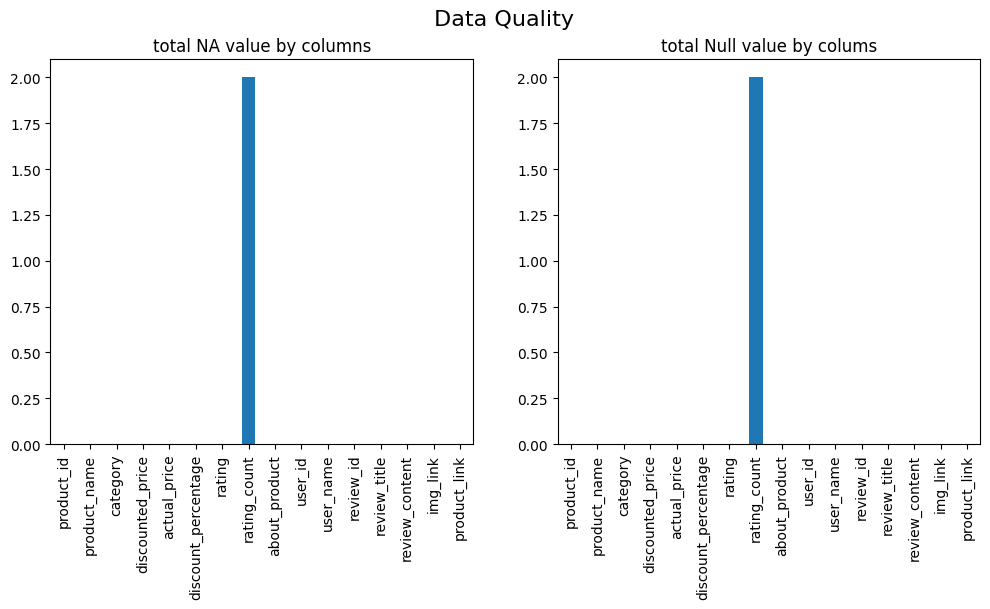

In [4]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df.isna().sum().plot(kind='bar')
plt.title('total NA value by columns')
plt.subplot(1,2,2)
df.isnull().sum().plot(kind='bar')
plt.title('total Null value by colums')
fig.suptitle(" Data Quality", fontsize=16 )
  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df['product_id'].duplicated().sum()

114

In [7]:
clean_df = df[~df['product_id'].duplicated() == True]

In [8]:
clean_df['product_id'].duplicated().sum()

0

as you can see our data have many relevant and irrelevant columns , so we will only keep the columns that are relevant to our semantic recommender like the product name , id 

In [9]:
df = clean_df[["product_id","product_name","discounted_price","about_product","img_link","product_link","rating"]]

In [10]:
df

,product_id,product_name,discounted_price,about_product,img_link,product_link,rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.2
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,"Compatible with all Type C enabled devices, be...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,【 Fast Charger& Data Sync】-With built-in safet...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.9
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,The boAt Deuce USB 300 2 in 1 cable is compati...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,4.2
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.2
...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,₹379,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,4
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"₹2,280","230 Volts, 400 watts, 1 Year",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,4.1
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"₹2,219",International design and styling|Two heat sett...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,3.6
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399",Fan sweep area: 230 MM ; Noise level: (40 - 45...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,4


## **2-Product description analysis**

In [11]:
df["desc_w_len"] = df["about_product"].str.split().str.len()

In [12]:
df["about_product"][0]

"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us."

<Axes: xlabel='desc_w_len', ylabel='Count'>

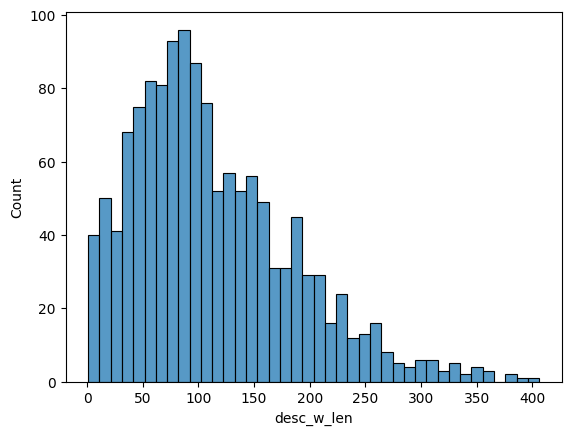

In [13]:
sns.histplot(df['desc_w_len'],bins=40)

the porpose of this histplot is to see the distrubition of the product descption column , and we cann see that we have 80 desc with a len ranging from 0 to 50 word , so we will set a limit of 25 word bc our recommender need a rich product descprition in order to capture meaning and find the best position for that descprition so we will drop all the rows with a desciption less than 25 that represent 107 row 

In [14]:
df['about_product'][df['desc_w_len'].between(0,25)]

15      1M Long Cable. Usb 2.0 (Type A)|Toughened Join...
33      USB Type-C to Type-C cable with universal comp...
52      Added Protection: An additional layer of prote...
55      Universal remote control|Ensures long lastinga...
60      This is Generic Airtel Tv Remote|Universal con...
                              ...                        
1424                         Sediment filter 10 inch Kent
1440                              removes dirt from water
1447    Golden American Heritage Soleplate,Overheat Sa...
1453                 Heat convector|Warranty for one year
1461                         230 Volts, 400 watts, 1 Year
Name: about_product, Length: 107, dtype: object

In [15]:
df = df[df["desc_w_len"]>=25]

<Axes: xlabel='desc_w_len', ylabel='Count'>

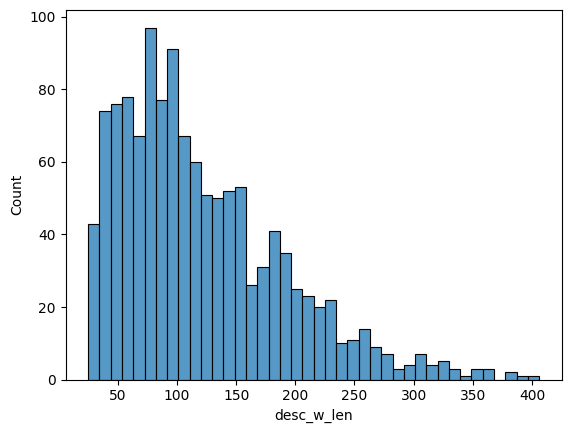

In [16]:
sns.histplot(df['desc_w_len'],bins=40)

In [17]:
df.head()

,product_id,product_name,discounted_price,about_product,img_link,product_link,rating,desc_w_len
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.2,132
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,"Compatible with all Type C enabled devices, be...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.0,93
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,【 Fast Charger& Data Sync】-With built-in safet...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.9,168
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,The boAt Deuce USB 300 2 in 1 cable is compati...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,4.2,109
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.2,95


In [18]:
df['tagged_description'] = df[["product_id","product_name","about_product"]].astype(str).agg(" ".join, axis=1)

In [19]:
df['tagged_description']

0       B07JW9H4J1 Wayona Nylon Braided USB to Lightni...
1       B098NS6PVG Ambrane Unbreakable 60W / 3A Fast C...
2       B096MSW6CT Sounce Fast Phone Charging Cable & ...
3       B08HDJ86NZ boAt Deuce USB 300 2 in 1 Type-C & ...
4       B08CF3B7N1 Portronics Konnect L 1.2M Fast Char...
                              ...                        
1459    B0B3JSWG81 NGI Store 2 Pieces Pet Hair Remover...
1460    B08L7J3T31 Noir Aqua - 5pcs PP Spun Filter + 1...
1462    B009P2LIL4 Bajaj Majesty RX10 2000 Watts Heat ...
1463    B00J5DYCCA Havells Ventil Air DSP 230mm Exhaus...
1464    B01486F4G6 Borosil Jumbo 1000-Watt Grill Sandw...
Name: tagged_description, Length: 1247, dtype: object

after cleaning the data from duplicated Rows and making sure our product desc has enough info for our semantic search model to capture , now we will start the preprocessing where we transform our data into raw text and we transform each desc into metadata 

## **3-Data preproccessing** 

In [20]:
! pip install langchain_community  langchain_openai langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.4/680.4 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00

In [21]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

first we need to transform our df to a text file so that we can apply the `CharacterTextSplitter`

In [22]:
df['tagged_description'].to_csv('tagged_description.text',sep='\n',
                        index=False,
                        header = False)

In [23]:
raw_doc = TextLoader('tagged_description.text').load()
text_splitter = CharacterTextSplitter(chunk_size=0,chunk_overlap=0,separator="\n")
doc = text_splitter.split_documents(raw_doc)

In [24]:
doc[1]

Document(metadata={'source': 'tagged_description.text'}, page_content='B098NS6PVG Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black) Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase')

## **4-creating the semantic recommendation system**

In [25]:
from langchain.embeddings import HuggingFaceEmbeddings

we need to the embedding_model

In [26]:
embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

db_products = Chroma.from_documents(
    doc,
    embedding=embedding
)

/tmp/ipykernel_20/3473734559.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
2025-05-10 19:22:14.009383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746904934.191778      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746904934.245770      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plu

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
query = "Hdmi for a tv"
recomm = db_products.similarity_search(query,k=5)
recomm

[Document(id='b4fa67e1-2f58-480d-90e1-67de2d715e8a', metadata={'source': 'tagged_description.text'}, page_content='B075ZTJ9XR AmazonBasics High-Speed Braided HDMI Cable - 3 Feet - Supports Ethernet, 3D, 4K and Audio Return (Black) Nylon-braided HDMI cable (A Male to A Male): supports Ethernet, 3D, 4K video, and Audio Return Channel (ARC)|Connects Bluray players, Fire TV, Apple TV, PS4, PS3, Xbox One, Xbox 360, computers, and other HDMI-enabled devices to TVs, displays, A/V receivers, and more|Allows for sharing an Internet connection among multiple devices without the need for a separate Ethernet cable|Meets the latest HDMI standards (4K video at 60 Hz, 2160p, 48 bit/px color depth); supports bandwidth up to 18 Gbps; backwards compatible with earlier versions|Cable length: 3 feet (0.9 meters); 1 year limited warranty'),
 Document(id='c3737101-10cf-4d24-b027-0d61f82f98e5', metadata={'source': 'tagged_description.text'}, page_content='B014I8SSD0 Amazon Basics High-Speed HDMI Cable, 6 Fee

In [28]:
relevant_feature = ["product_name","discounted_price","about_product"]
def retrieve_recommandation(query,top_k=10):
    recomms = db_products.similarity_search(query,k=50)
    
    prod_lists = []
    
    for recom in recomms:
        product_id = recom.page_content.strip('"').split()[0]
        prod_lists.append(product_id)
    return df[df['product_id'].isin(prod_lists)][relevant_feature].head(top_k)    

In [29]:
query = "Hdmi for a tv"
retrieve_recommandation(query)

,product_name,discounted_price,about_product
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,₹219,"Flexible, lightweight HDMI cable for connectin..."
21,tizum HDMI to VGA Adapter Cable 1080P for Proj...,₹279,Superior Stability: Built-in advanced Certifie...
22,Samsung 80 cm (32 Inches) Wondertainment Serie...,"₹13,490",Resolution: HD Ready (1366x768) | Refresh Rate...
24,Acer 80 cm (32 inches) I Series HD Ready Andro...,"₹11,499",Resolution : HD Ready (1366x768) | Refresh Rat...
25,Tizum High Speed HDMI Cable with Ethernet | Su...,₹199,Latest Standard HDMI A Male to A Male Cable: S...
26,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"₹14,999",Resolution: HD Ready (1366x768) | Refresh Rate...
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"₹32,999",Resolution: 4K Ultra HD (3840x2160) | Bezel-le...
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",₹309,Please select appropriate display resolution &...
57,OnePlus 80 cm (32 inches) Y Series HD Ready Sm...,"₹15,999",Resolution : HD Ready (1366x768) | Refresh Rat...
64,Redmi 80 cm (32 inches) Android 11 Series HD R...,"₹13,999",Resolution: HD Ready (1366 x 768) | Refresh Ra...


In [30]:
recomm[1].page_content.strip('"').split()[0]

'B014I8SSD0'